# Taller 2

# Punto 1: Multiplicación de matrices

La  precondición del algoritmo es que las matrices de entrada deben ser cuadradas.

In [2]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

In [2]:
a = np.matrix('1 2 3; 3 4  5;2 3 11')
print a

[[ 1  2  3]
 [ 3  4  5]
 [ 2  3 11]]


In [3]:
temp = []
temp = np.random.random((3,3))
print temp 

[[ 0.93853036  0.23105138  0.99018425]
 [ 0.50487075  0.61077421  0.36706644]
 [ 0.09602838  0.5090104   0.0560003 ]]


In [4]:
c = a + temp

In [5]:
print len(a)

3


In [46]:
def multmatric(matA , matB):
    
    dim = len(matA)
    matriz = np.zeros((dim,dim))
    for i in range(0, dim):
        for j in range(0,dim): 
            aux = 0
            for k in range (0,dim):
                aux += matA[i][k] * matB[k][j]
                matriz[i][j] = aux        
    return matriz

In [48]:
a = multmatric([[1,1],[1,1]],[[1,1],[1,1]])
print a

1
1
1
1
1
1
1
1
[[ 2.  2.]
 [ 2.  2.]]


In [70]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
    
    
def multmatric_acct(matA , matB, acct):
    
    dim = len(matA)
    matriz = np.zeros((dim,dim)); acct.count()
    for i in range(0, dim):
        acct.count()
        for j in range(0,dim): 
            acct.count()
            aux = 0; acct.count()
            for k in range (0,dim):
                aux += matA[i][k] * matB[k][j]
                matriz[i][j] = aux        
    return matriz

In [71]:
import random as rnd

def exper_analysisMatrices(n):
    results = []
    acct = Counter()
    for i in range(n):
        temp = np.random.random((i,i))
        temp2 = np.random.random((i,i))
        acct.reset()
        multmatric_acct(temp,temp,acct)
        results.append(acct.steps)
    return results
print exper_analysisMatrices(10);

[1, 4, 11, 22, 37, 56, 79, 106, 137, 172]


# Punto 2: Divide and Conquer

In [5]:
def volverCuadrada(mat):
    tam = len(mat)
    auxx = np.zeros((tam,1))
    auxy = np.zeros((1, tam+1))
    mat = np.c_[mat,auxx]
    mat = np.r_[mat,auxy]
    return mat

In [61]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
        
        
def multMatr(temp1 , temp2, acct):
    true = True;acct.count()
    tam = len(temp1);acct.count()
    if (len(temp1) <= 2):
        acct.count()
        aux = temp1*temp2;acct.count()
        return aux
         
    else : 
        par = tam%2
        if(par != 0 ):
            acct.count()
            true = False
            temp1 = volverCuadrada(temp1)
            temp2 = volverCuadrada(temp2)
            tam = tam + 1
            

        tam = tam/2;acct.count()
        a = temp1[:tam,:tam];acct.count(); b = temp1[tam:, :tam];acct.count(); c = temp1[tam:,tam:]; d= temp1[:tam,tam:]
        a1 = temp2[:tam,:tam];acct.count(); b1 = temp2[tam:, :tam];acct.count(); c1 = temp2[tam:,tam:]; d1= temp2[:tam,tam:]

    ma = multMatr(a,a1,acct);acct.count()
    mb = multMatr(d,b1,acct);acct.count()
    mc = multMatr(a,d1,acct);acct.count()
    md = multMatr(d,c1,acct);acct.count()
    ma1 = multMatr(b,a1,acct);acct.count()
    mb1 = multMatr(c,b1,acct);acct.count()
    mc1 = multMatr(b,d1,acct);acct.count()
    md1 = multMatr(c,c1,acct);acct.count()
    
    s1 = ma1 + mb1;acct.count()
    s2 = ma + mb;acct.count()
    s3 = mc1 + md1;acct.count()
    s4 = mc + md;acct.count()
    
    s2 = np.c_[s2,s4];acct.count()
    s1 = np.c_[s1,s3];acct.count()
    s2 = np.r_[s2,s1];acct.count()
    
    if true == False:
        tam = len(s2);acct.count()
        s2 = s2[:tam-1,:tam-1];acct.count()
    return s2   



In [53]:
a = np.matrix('1 2 3;3 4 5;2 3 11')
print a
a = volverCuadrada(a)
print a

[[ 1  2  3]
 [ 3  4  5]
 [ 2  3 11]]
[[  1.   2.   3.   0.]
 [  3.   4.   5.   0.]
 [  2.   3.  11.   0.]
 [  0.   0.   0.   0.]]


In [54]:
a = np.matrix('1 2 3; 3 4  5;2 3 11')
print multMatr(a,a)

[[  13.   19.   46.]
 [  25.   37.   84.]
 [  33.   49.  142.]]


In [55]:
b = a*a
print b

[[ 13  19  46]
 [ 25  37  84]
 [ 33  49 142]]


In [68]:
import random as rnd

def exper_analysisMat(n):
    results = []
    acct = Counter()
    for i in range(n):
        temp = np.random.random((i,i))
        temp2 = np.random.random((i,i))
        acct.reset()
        multMatr(temp,temp,acct)
        results.append(acct.steps)
    return results
print exper_analysisMat(10)

[4, 4, 4, 57, 54, 481, 478, 457, 454, 3873]


# Comparación Punto 1 VS Punto 2

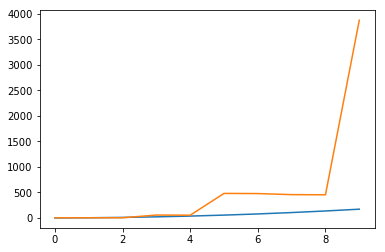

In [78]:
pl.clf()
x = np.arange(10)
y = np.array(exper_analysisMatrices(10))
y2 = np.array(exper_analysisMat(10))
pl.plot(x, y , x, y2)